# Neural Networks and Deep Learning Notes

Notes and equations from [neuralnetworksanddeeplearning.com](http://neuralnetworksanddeeplearning.com/)

# Chapter 3

Techniques covered:

- Cross-entropy cost function.
- Regularization methods: L1, L2, dropout, artificially expanding training data.
- Weight initialization.
- Heuristics for hyperparameter selection.

## Cross-Entropy Cost Function

- We learn slowly when our errors are not well-defined.
- Artificial neurons can have more difficulty learning when they're badly wrong (high error) than when they're just a little wrong (low error).

### Neuron Learning Slowly

- Neuron learns by changing the weight and bias at a rate determined by the partial derivatives of the cost function.
- Learning "slow" can be attributed to small partial derivatives.
- The partial derivative of the cst w.r.t. the weight uses the derivative of the sigmoid function. 
- When an input to the sigmoid function is close to one, the sigmoid curve is close to flat, making its partial derivative small, making it learn slowly.

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction=0.3
set_session(tf.Session(config=config))

Using TensorFlow backend.


('Learned weights', array([[-1.51694441]], dtype=float32))
('Learned bias', array([-1.21694458], dtype=float32))


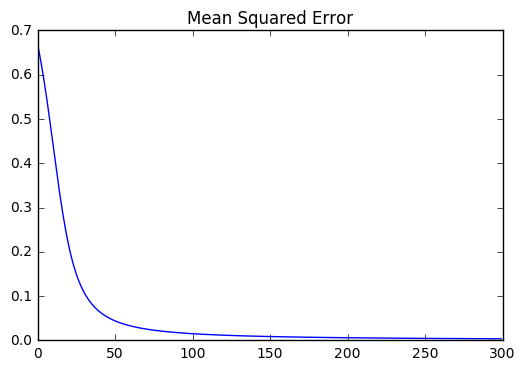

In [25]:
# Copying Nielsen's first example:
# initial weight = 0.6, bias = 0.9, learning rate = 0.15, mse cost function
# It learns fairly quickly, error is 0 by about 250 epochs.
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)

X = np.ones((1))
y = np.zeros((1))

model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid', 
                weights=[np.float32([[0.6]]),np.float32([0.9])]))

sgd = SGD(lr=0.15)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mean_squared_error'])
fit_result = model.fit(X,y, batch_size=2, nb_epoch=300, verbose=0)

print('Learned weights', model.get_weights()[0])
print('Learned bias', model.get_weights()[1])

plt.title('Mean Squared Error, Start with decent weights.')
plt.plot(fit_result.history['mean_squared_error'])
plt.show()

('Learned weights', array([[-1.23814285]], dtype=float32))
('Learned bias', array([-1.23814285], dtype=float32))
[array([[-1.23814285]], dtype=float32), array([-1.23814285], dtype=float32)]


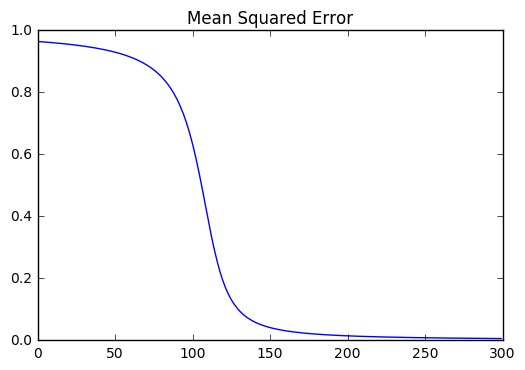

In [24]:
# Same example, this time with worse starting weight and bias, both = 2.0.
# This should demonstrate that the model is sensitive to the initial weights and bias.
# The difference in shapes mirror his demos almost perfectly.
X = np.ones((1))
y = np.zeros((1))

model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid', 
                weights=[np.float32([[2.0]]),np.float32([2.0])]))

sgd = SGD(lr=0.15)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mean_squared_error'])
fit_result = model.fit(X,y, batch_size=2, nb_epoch=300, verbose=0)

print('Learned weights', model.get_weights()[0])
print('Learned bias', model.get_weights()[1])

plt.title('Mean Squared Error')
plt.plot(fit_result.history['mean_squared_error'])
plt.show()